**Title:** ***Learn Probability Density Functions using Roll-Number-Parameterized Non-Linear Model***

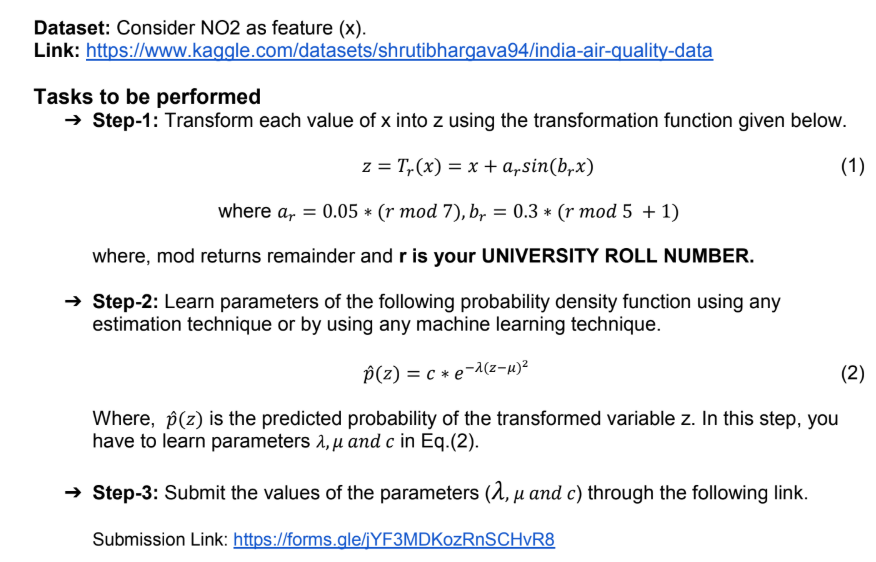

In [3]:
#Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#Load Dataset
df = pd.read_csv("/content/data.csv", encoding="latin1")
df.head()


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [7]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [8]:
#Extract NO2 Feature
x = df["no2"].dropna().values

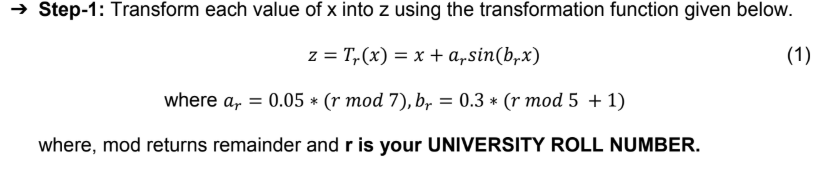

In [9]:
#Assigning Roll No to r
r = 102497014
#Parameters
ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)

In [10]:
#Applying Transformation
z = x + ar * np.sin(br * x)
print(z)

[17.5646666   6.82406085 28.31134918 ... 14.9025651  14.9025651
 15.81888433]


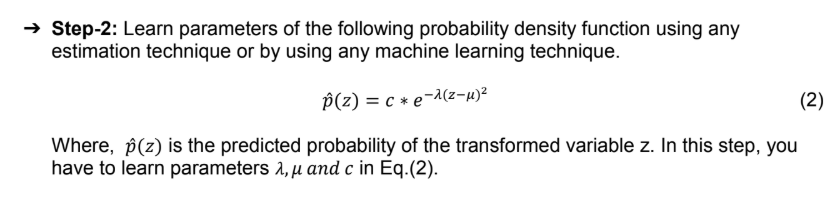

In [21]:
# Mean of transformed variable
m = np.mean(z)
print("Estimated m =", m)

Estimated m = 22.11820900304399


In [22]:
# Variance of transformed variable
variance = np.var(z)
print("Estimated variance =", variance)

Estimated variance = 157.5976679023324


In [27]:
# Compute lambda
lambda_ = 1 / (2 * variance)
print("Estimated lambda =", lambda_)

Estimated lambda = 0.0031726357798001407


In [29]:
c = np.sqrt(lambda_ / np.pi)
print("Estimated c =", c)

Estimated c = 0.031778630146228844


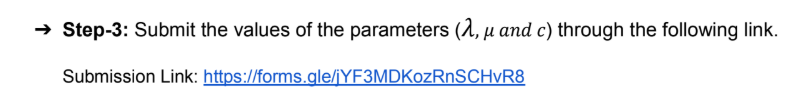

In [30]:
print("Final parameters:")
print("lambda =", lambda_)
print("mu =", m)
print("c =", c)

Final parameters:
lambda = 0.0031726357798001407
mu = 22.11820900304399
c = 0.031778630146228844


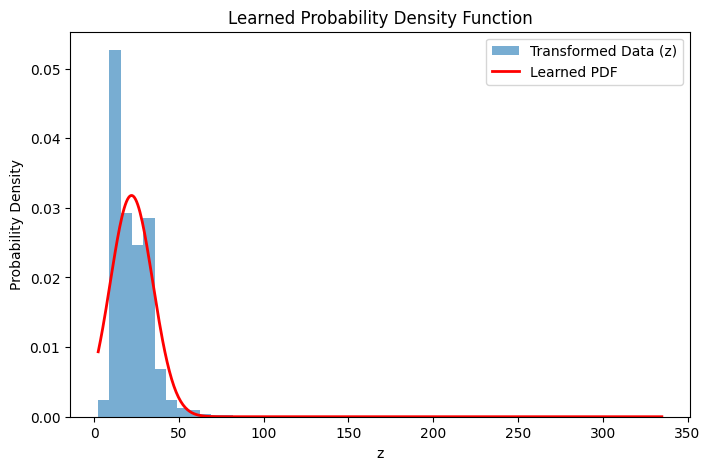

In [32]:
import matplotlib.pyplot as plt

# Range of z values
z_range = np.linspace(min(z), max(z), 500)

# Learned PDF
pdf = c * np.exp(-lambda_ * (z_range - m)**2)

# Plot histogram and PDF
plt.figure(figsize=(8, 5))
plt.hist(z, bins=50, density=True, alpha=0.6, label="Transformed Data (z)")
plt.plot(z_range, pdf, 'r', linewidth=2, label="Learned PDF")

plt.xlabel("z")
plt.ylabel("Probability Density")
plt.title("Learned Probability Density Function")
plt.legend()
plt.show()
